# London House Price Data Machine Learning Project Part 2


## Import packages

The first thing that I need to do is import all of the relevant packages that I will need to complete this problem.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
import copy
import math
%matplotlib inline


# Define the problem

Firstly I want to import, get brief descriptions about it and try to make sure that there is not any garbage

In [29]:
prices_raw = pd.read_csv('London.csv')
count_flat = (prices_raw['House Type'] == 'Flat / Apartment').sum()
count_house = (prices_raw['House Type'] == 'House').sum()
count_new = (prices_raw["House Type"] == 'New development').sum()

print(f"No of flats: {count_flat}")
print(f"No of houses: {count_house}")
print(f"No of new builds: {count_new}")



No of flats: 1565
No of houses: 1430
No of new builds: 357


This time I am going to split the analysis by property type and build in all 4 features from the dataset.

In [30]:
flat_price_data = prices_raw.loc[prices_raw['House Type'] == 'Flat / Apartment',['Price','Area in sq ft', 'No. of Bedrooms','No. of Bathrooms','No. of Receptions']]
house_price_data = prices_raw.loc[prices_raw['House Type'] == 'New development',['Price','Area in sq ft', 'No. of Bedrooms','No. of Bathrooms','No. of Receptions']]
new_price_data = prices_raw.loc[prices_raw['House Type'] == 'House',['Price','Area in sq ft', 'No. of Bedrooms','No. of Bathrooms','No. of Receptions']]

As before we will make a trainging and test set, remembering to split it by type as above.


In [31]:
train_f, test_f = train_test_split(flat_price_data,test_size= 0.8)
train_h, test_h = train_test_split(house_price_data,test_size= 0.8)
train_n, test_n = train_test_split(new_price_data,test_size= 0.8)

I think I need to convert the data to numpy arrays and again we are doing this three times.

In [32]:
xf_train = train_f[['Area in sq ft','No. of Bedrooms','No. of Bathrooms','No. of Receptions']].to_numpy()
yf_train = train_f['Price'].to_numpy()
xh_train = train_h[['Area in sq ft','No. of Bedrooms','No. of Bathrooms','No. of Receptions']].to_numpy()
yh_train = train_h['Price'].to_numpy()
xn_train = train_n[['Area in sq ft','No. of Bedrooms','No. of Bathrooms','No. of Receptions']].to_numpy()
yn_train = train_n['Price'].to_numpy()

In [33]:
scaler = StandardScaler()
xf_norm = scaler.fit_transform(xf_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(xf_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(xf_norm,axis=0)}")

xh_norm = scaler.fit_transform(xh_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(xh_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(xh_norm,axis=0)}")

xn_norm = scaler.fit_transform(xn_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(xn_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(xn_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[5615    4    4    4]
Peak to Peak range by column in Normalized X:[8.97412215 4.80742624 4.80742624 4.80742624]
Peak to Peak range by column in Raw        X:[5518    5    5    5]
Peak to Peak range by column in Normalized X:[5.19690999 4.09864046 4.09864046 4.09864046]
Peak to Peak range by column in Raw        X:[10224     7     7     7]
Peak to Peak range by column in Normalized X:[7.47680747 5.8548775  5.8548775  5.8548775 ]


In [34]:
sgdrf = SGDRegressor(max_iter=1000,tol=1e-3, alpha=1e-10)
sgdrf.fit(xf_norm, yf_train)
print(f"number of iterations completed: {sgdrf.n_iter_}, number of weight updates: {sgdrf.t_}")

number of iterations completed: 18, number of weight updates: 5635.0


In [35]:
sgdrh = SGDRegressor(max_iter=1000, tol=1e-10)
sgdrh.fit(xh_norm, yh_train)
print(f"number of iterations completed: {sgdrh.n_iter_}, number of weight updates: {sgdrh.t_}")

number of iterations completed: 126, number of weight updates: 8947.0


In [36]:
sgdrn = SGDRegressor(max_iter=1000, tol=1e-10)
sgdrn.fit(xn_norm, yn_train)
print(f"number of iterations completed: {sgdrn.n_iter_}, number of weight updates: {sgdrn.t_}")

number of iterations completed: 17, number of weight updates: 4863.0


In [37]:
bf_norm = sgdrf.intercept_
wf_norm = sgdrf.coef_
print(f"model parameters:                   w: {wf_norm}, b:{bf_norm}")

model parameters:                   w: [1804393.49626142  -73127.80027347  -73127.80027347  -73127.80027347], b:[1356317.42640512]


In [38]:
bh_norm = sgdrh.intercept_
wh_norm = sgdrh.coef_
print(f"model parameters:                   w: {wh_norm}, b:{bh_norm}")

model parameters:                   w: [3878201.44732652 -609713.22817074 -609713.22817074 -609713.22817074], b:[2518610.3800994]


In [39]:
bn_norm = sgdrn.intercept_
wn_norm = sgdrn.coef_
print(f"model parameters:                   w: {wn_norm}, b:{bn_norm}")

model parameters:                   w: [1158388.81344431  -44019.47191802  -44019.47191802  -44019.47191802], b:[2372574.19503794]


In [40]:
yf_pred_sgd = sgdrf.predict(xf_norm)
yf_pred = np.dot(xf_norm, wf_norm) + bf_norm  
print(f"Flat prediction using np.dot() and sgdr.predict match: {(yf_pred == yf_pred_sgd).all()}")

print(f"Flatp rediction on training set:\n{yf_pred[:4]}" )
print(f"Flat target values \n{yf_train[:4]}")

Flat prediction using np.dot() and sgdr.predict match: True
Flatp rediction on training set:
[ 721635.77477092 3634329.65299004 4959666.55782947 1680312.28730727]
Flat target values 
[1150000 3750000 3250000 1100000]


In [41]:
yh_pred_sgd = sgdrh.predict(xh_norm)
yh_pred = np.dot(xh_norm, wh_norm) + bh_norm  
print(f"House prediction using np.dot() and sgdr.predict match: {(yh_pred == yh_pred_sgd).all()}")

print(f"House prediction on training set:\n{yh_pred[:4]}" )
print(f"House target values \n{yh_train[:4]}")

House prediction using np.dot() and sgdr.predict match: True
House prediction on training set:
[2043712.09641886 5162973.22960414  851194.22796153  361755.12743831]
House target values 
[  995000 14250000  1325000   499000]


In [42]:
yn_pred_sgd = sgdrn.predict(xn_norm)
yn_pred = np.dot(xn_norm, wn_norm) + bn_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(yn_pred == yn_pred_sgd).all()}")

print(f"Prediction on training set:\n{yf_pred[:4]}" )
print(f"Target values \n{yf_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[ 721635.77477092 3634329.65299004 4959666.55782947 1680312.28730727]
Target values 
[1150000 3750000 3250000 1100000]


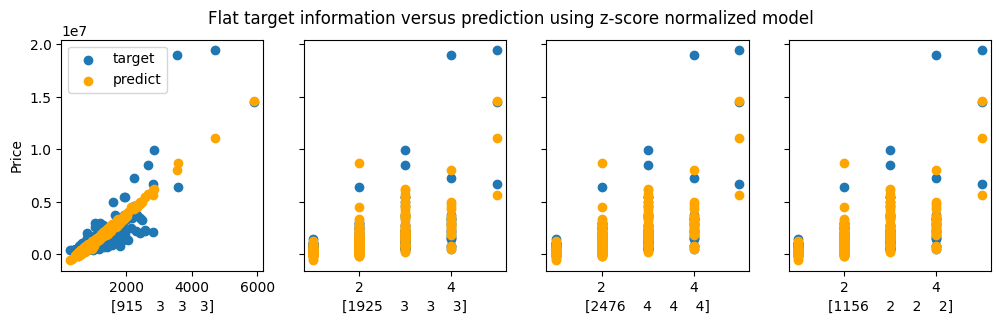

In [43]:
# plot predications vs targets for flat data
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(xf_train[:,i],yf_train, label = 'target')
    ax[i].set_xlabel(xf_train[i])
    ax[i].scatter(xf_train[:,i],yf_pred,color=["orange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("Flat target information versus prediction using z-score normalized model")
plt.show()

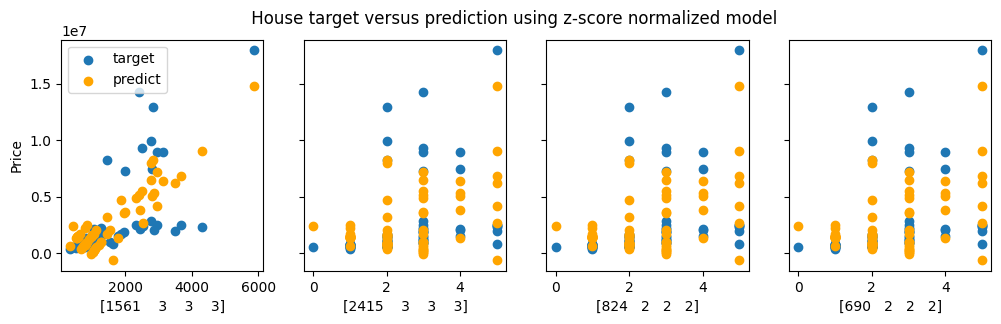

In [44]:
# plot predications vs targets for houses data
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(xh_train[:,i],yh_train, label = 'target')
    ax[i].set_xlabel(xh_train[i])
    ax[i].scatter(xh_train[:,i],yh_pred,color=["orange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle(" House target versus prediction using z-score normalized model")
plt.show()

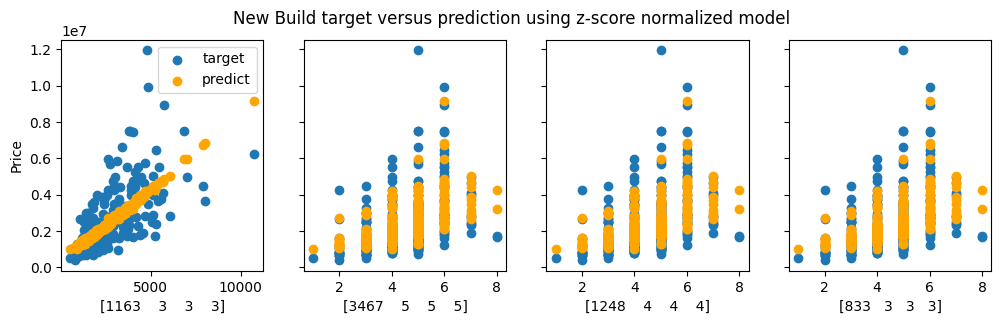

In [45]:
# plot predications vs targets for new build  data
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(xn_train[:,i],yn_train, label = 'target')
    ax[i].set_xlabel(xn_train[i])
    ax[i].scatter(xn_train[:,i],yn_pred,color=["orange"], label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("New Build target versus prediction using z-score normalized model")
plt.show()

I need to find out if this model represents reality.

# NEED TO FINISH OFF THE BLOCK BELOW AND REPEAT FOR OTHER ACCOMODATION TYPES

In [ ]:
msef = mean_squared_error(y_test, y_pred)
r2f = r2_score(y_test, y_pred)

print(f"Mean squared error: {msef:.2f}")
print(f"R2 score: {r2f:.2f}")

Below I will try to do the same gradient descent as in the single example but with multiple features

In [46]:

# def gradient_descent_multi(X, y, theta, alpha, num_iters):
#     m = len(y)  # number of training examples
#     n = X.shape[1]  # number of features
#     J_history = []

#     for _ in range(num_iters):
#         # Compute predictions
#         h = np.dot(X, theta)
        
#         # Compute gradients
#         gradients = (1/m) * np.dot(X.T, (h - y))
        
#         # Update parameters
#         theta = theta - alpha * gradients
        
#         # Compute cost
#         J = (1/(2*m)) * np.sum((h - y)**2)
#         J_history.append(J)

#     return theta, J_history

# # Prepare data
# def prepare_data(X, y):
#     m, n = X.shape
#     X = np.hstack((np.ones((m, 1)), X))  
#     return X, y.reshape(-1, 1)

# # Example usage
# X = xf_train  # Features
# y = yf_train # Target values

# # Prepare data
# X, y = prepare_data(X, y)

# # Initialize parameters
# theta = np.zeros((X.shape[1], 1))

# # Set hyperparameters
# alpha = 1e-10
# num_iters = 1000

# # Run gradient descent
# theta_optimal, J_history = gradient_descent_multi(X, y, theta, alpha, num_iters)

# print("Optimal theta:", theta_optimal.flatten())
# print("Final cost:", J_history[-1])

# # Make predictions
# X_test = np.array([[5, 6,4,5,6]])
# X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
# prediction = np.dot(X_test, theta_optimal)

# print("Prediction for [5, 6]:", prediction[0][0])